In [3]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [4]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [6]:
def rho_red_light(x, rho_max):
    rho = rho_max * numpy.ones_like(x)
    mask = numpy.where(x < 3.0)
    rho[mask] = 0.5 * rho_max
    return rho

In [7]:
nx = 81
L = 4.0
dx = L / (nx-1)
nt = 40
rho_max = 10.0
u_max = 1.0

x = numpy.linspace(0.0, L, num=nx)

rho0 = rho_red_light(x, rho_max)


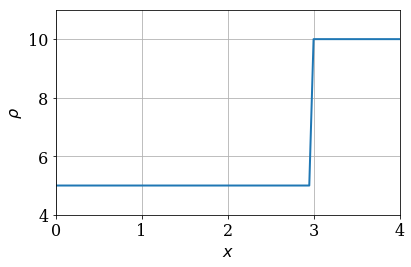

In [8]:
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0,
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(4.0, 11.0)
pyplot.tight_layout()

In [9]:
def flux(rho, u_max, rho_max):
    F = rho * u_max * (1.0 - rho/rho_max)
    return F

In [10]:
def lax_friedrichs(rho0, nt, dt, dx, bc_values, *args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = flux(rho, *args)
        rho[1:-1] = (0.5 * (rho[:-2] + rho[2:]) - dt / (2.0 * dx) * (F[2:] - F[:-2]))
        rho[0] = bc_values[0]
        rho[-1] = bc_values[1]
        rho_hist.append(rho.copy())
    return rho_hist

In [14]:
sigma = 1.0
dt = sigma * dx / u_max
rho_hist = lax_friedrichs(rho0, nt, dt, dx, (rho0[0], rho0[-1]), u_max, rho_max)



In [15]:
def jacobian(rho, u_max, rho_max):
    j = u_max * (1.0 - 2.0 * rho/rho_max)
    return J

In [21]:
def lax_wendroff(rho0, nt, dt, dx, bc_values, *args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = flux(rho, *args)
        J = jacobian(rho, *args)
        rho[1:-1] = (rho[1:-1] - 
                     dt / (2.0 * dx) * (F[2:] - F[:-2]) +
                     dt**2 / (4.0 * dx**2) *
                     ((J[1:-1] + J[2:]) * (F[2:] - F[1:-1]) -
                     (J[:-2] + J[1:-1]) * (F[1:-1] - F[:-2])))
        rho[0] = bc_values[0]
        rho[-1] = bc_values[1]
        rho_his.append(rho.copy())
    return rho_hist

interactive(children=(IntSlider(value=0, description='time step', max=40), Output()), _dom_classes=('widget-in…

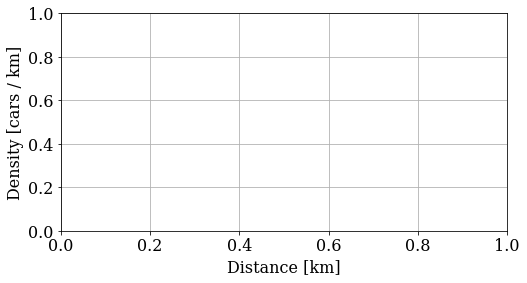

In [26]:
sigma = 1.0
dt = sigma * dx / u_max
rho_hist = lax_wendroff



In [22]:
def maccormack(rho0, nt, dt, dx, bc_values, *args):
 
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    rho_star = rho.copy()
    for n in range(nt):
        
        F = flux(rho, *args)
        
        rho_star[1:-1] = (rho[1:-1] -
                          dt / dx * (F[2:] - F[1:-1]))
        
        F = flux(rho_star, *args)
        
        rho[1:-1] = 0.5 * (rho[1:-1] + rho_star[1:-1] -
                           dt / dx * (F[1:-1] - F[:-2]))
        
        rho[0] = bc_values[0]
        
        rho[-1] = bc_values[1]
        
        rho_hist.append(rho.copy())
    return rho_hist

In [27]:

sigma = 0.1
dt = sigma * dx / u_max 


rho_hist = maccormack(rho0, nt, dt, dx, (rho0[0], rho0[-1]),
                      u_max, rho_max)

# create a function to plot your solution
import ipywidgets
def plot_density(n, rho_hist):
   pyplot.figure(figsize=(8.0,4.0))
   pyplot.xlabel('Distance [km]')
   pyplot.ylabel('Density [cars / km]')
   pyplot.grid()
   pyplot.plot(x, rho_hist[0], label='Initial')
   pyplot.plot(x, rho_hist[n], label='Time step {}'.format(n))
   pyplot.ylim(rho_hist[0].min() - 1.0, rho_hist[0].max() + 1.0)
   pyplot.legend()

# create a ipywidgets slider for the time levels
nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,
                                description='time step')

# create the ipywidgets interactive figure
w = ipywidgets.interactive(plot_density,
                              n=nt_slider,
                              rho_hist=ipywidgets.fixed(rho_hist))

# display the interactive figure
display(w)

interactive(children=(IntSlider(value=0, description='time step', max=40), Output()), _dom_classes=('widget-in…